###패키지 import

In [ ]:
#자연어처리 패키지 설치
!pip install nltk

In [1]:
import pandas as pd
import glob
import re
from functools import reduce
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud


#### NLTK 리소스를 최초 한번 다운로드

In [3]:
import nltk

In [16]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
#파일병합
all_files = glob.glob('./data/myCabinetExcelData*.xls')
all_files

['./data\\myCabinetExcelData (0).xls',
 './data\\myCabinetExcelData (1).xls',
 './data\\myCabinetExcelData (2).xls',
 './data\\myCabinetExcelData (3).xls',
 './data\\myCabinetExcelData (4).xls',
 './data\\myCabinetExcelData (5).xls',
 './data\\myCabinetExcelData (6).xls',
 './data\\myCabinetExcelData (7).xls',
 './data\\myCabinetExcelData (8).xls',
 './data\\myCabinetExcelData (9).xls']

In [3]:
all_data = []
for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)
all_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
2,NaN,3,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
3,NaN,4,"Capturing the value of biosurveillance ""big da...","Castle, David; Hebert, Paul D.N.; Clare, Eliza...",John Wiley & Sons Ltd,2021
4,NaN,5,Call for Special Issue Papers: Big Data-Driven...,"Chakraborty, Chinmay; Khan, Muhammad Khurram; ...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
95,NaN,96,Comparative study of big data of global adakit...,"Xuelong, Liu; Wenchang, Li; Qi, Zhang; Na, Zha...",John Wiley & Sons Ltd,2018
96,NaN,97,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
97,NaN,98,New discrimination diagrams for basalts based ...,"Zhang, Qi; Sun, Weidong; Zhao, Yong; Yuan, Fan...",John Wiley & Sons Ltd,2019
98,NaN,99,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014


In [4]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)
all_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
2,NaN,3,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
3,NaN,4,"Capturing the value of biosurveillance ""big da...","Castle, David; Hebert, Paul D.N.; Clare, Eliza...",John Wiley & Sons Ltd,2021
4,NaN,5,Call for Special Issue Papers: Big Data-Driven...,"Chakraborty, Chinmay; Khan, Muhammad Khurram; ...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
995,NaN,96,How `Big Data' Is Different,"Davenport, T.H.; Barth, P.; Bean, R.",SLOAN MANAGEMENT REVIEW ASSOCIATION,2012
996,NaN,97,Is ''Big Data'' creepy?,"Cumbley, R.; Church, P.","Elsevier Science B.V., Amsterdam.",2013
997,NaN,98,Solving Big Data: Distributing Computation Amo...,"Preden, Jurgo; Pahtma, Raido; Tomson, Timo;...",IOS Press,2014
998,NaN,99,Handling big data: research challenges and fut...,"Anagnostopoulos, I.; Zeadally, S.; Exposito, E.",Springer Science + Business Media,2016


In [5]:
all_data_concat.to_csv('./data/riss_bigdata.csv', index=False, encoding='utf-8')

#### 데이터 전처리

In [6]:
all_title = all_data_concat['제목']
all_title

0            Architecting Time-Critical Big-Data Systems
1      A trust-based crowdfunding campaign marketing ...
2      Computation migration: a new approach to execu...
3      Capturing the value of biosurveillance "big da...
4      Call for Special Issue Papers: Big Data-Driven...
                             ...                        
995                          How `Big Data' Is Different
996                              Is ''Big Data'' creepy?
997    Solving Big Data: Distributing Computation Amo...
998    Handling big data: research challenges and fut...
999    Using big data for co-innovation processes: Ma...
Name: 제목, Length: 1000, dtype: object

In [7]:
stopWords = set(stopwords.words('english'))     #nltk.corpus에서 제공하는 영어 불용어를 불러와서 저장
lemma = WordNetLemmatizer()             #표제어 추출작업을 제공하는 wordnetlemmatizer 객체를 생성

In [8]:
words=[]

for title in all_title:
    EnWords = re.sub(r'[^a-zA-Z]+', ' ', str(title))        #정규식을 이용해 영어가 아닌것을 공백으로 치환하여 제거
    EnwordsToken = word_tokenize(EnWords.lower())           # 소문자로 정규화하여lower() 단어 토큰화word_tokenize()
    EnwordsTokenStop = [w for w in EnwordsToken if w not in stopWords]      #불용어를 제거stopwords
    EnwordsTokenStopLemma = [lemma.lemmatize(w) for w in EnwordsTokenStop]  #표제어를 추출lemmatize(w)
    words.append(EnwordsTokenStopLemma)

In [9]:
print(words)

[['architecting', 'time', 'critical', 'big', 'data', 'system'], ['trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['capturing', 'value', 'biosurveillance', 'big', 'data', 'natural', 'capital', 'accounting'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation'], ['diversity', 'big', 'data', 'review'], ['data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier'], ['structural', 'consequence', 'big', 'data', 'driven', 'education'], ['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['big', 'boe', 'fusing', 'spanis

In [10]:
#2차원 리스트를 1차원 리스트로 변환
words_reduce = list(reduce(lambda x,y: x+y, words))
print(words_reduce)

['architecting', 'time', 'critical', 'big', 'data', 'system', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'capturing', 'value', 'biosurveillance', 'big', 'data', 'natural', 'capital', 'accounting', 'call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'diversity', 'big', 'data', 'review', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier', 'structural', 'consequence', 'big', 'data', 'driven', 'education', 'author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'big', 'boe', 'fusing', 'spanish', 'official', 'gaze

In [11]:
count = Counter(words_reduce)
count

Counter({'architecting': 1,
         'time': 20,
         'critical': 6,
         'big': 1112,
         'data': 1240,
         'system': 57,
         'trust': 1,
         'based': 95,
         'crowdfunding': 2,
         'campaign': 2,
         'marketing': 8,
         'framework': 36,
         'theoretical': 6,
         'underpinnings': 1,
         'analytics': 110,
         'practice': 9,
         'computation': 4,
         'migration': 1,
         'new': 41,
         'approach': 52,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'capturing': 2,
         'value': 10,
         'biosurveillance': 1,
         'natural': 2,
         'capital': 2,
         'accounting': 2,
         'call': 30,
         'special': 36,
         'issue': 48,
         'paper': 29,
         'driven': 65,
         'futuristic': 3,
         'fabric': 3,
         'societal': 3,
         'digital': 15,
         'transformation': 8,
         'diversity': 2,
         'review': 

In [12]:
word_count = dict()

for tag, counts in count.most_common(50):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print(f'{tag} : {counts}')

data : 1240
big : 1112
analytics : 110
based : 95
analysis : 87
driven : 65
system : 57
using : 56
approach : 52
issue : 48
challenge : 47
model : 47
learning : 45
application : 43
new : 41
framework : 36
special : 36
science : 35
management : 34
platform : 32
call : 30
research : 30
health : 30
paper : 29
era : 29
opportunity : 29
algorithm : 29
cloud : 29
smart : 27
technology : 26
processing : 26
network : 25
mining : 24
machine : 24
business : 24
computing : 24
information : 24
earth : 24
review : 23
use : 23
process : 23
perspective : 23
method : 22
optimization : 22
intelligence : 21
real : 21
time : 20
distributed : 20
performance : 20
development : 20


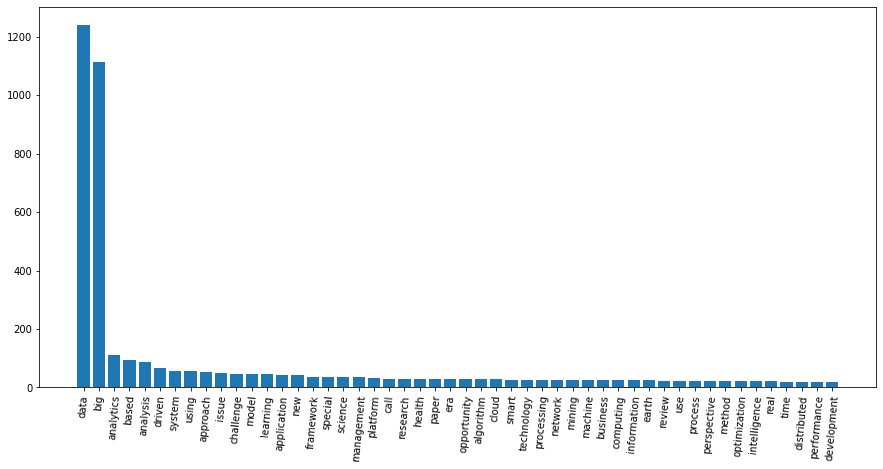

In [20]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
plt.figure(figsize=(15,7))
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')
plt.show()

#### 결과 시각화

In [14]:
all_data_concat['doc_count']=0
summary_year = all_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1995,1
1,2003,1
2,2004,1
3,2006,1
4,2009,1
5,2011,5
6,2012,20
7,2013,54
8,2014,135
9,2015,101


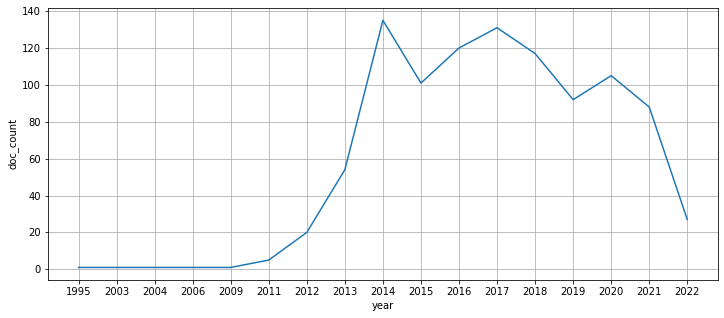

In [21]:
plt.figure(figsize=(12,5))
plt.xlabel('year')
plt.ylabel('doc_count')
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

#### 워드 클라우드

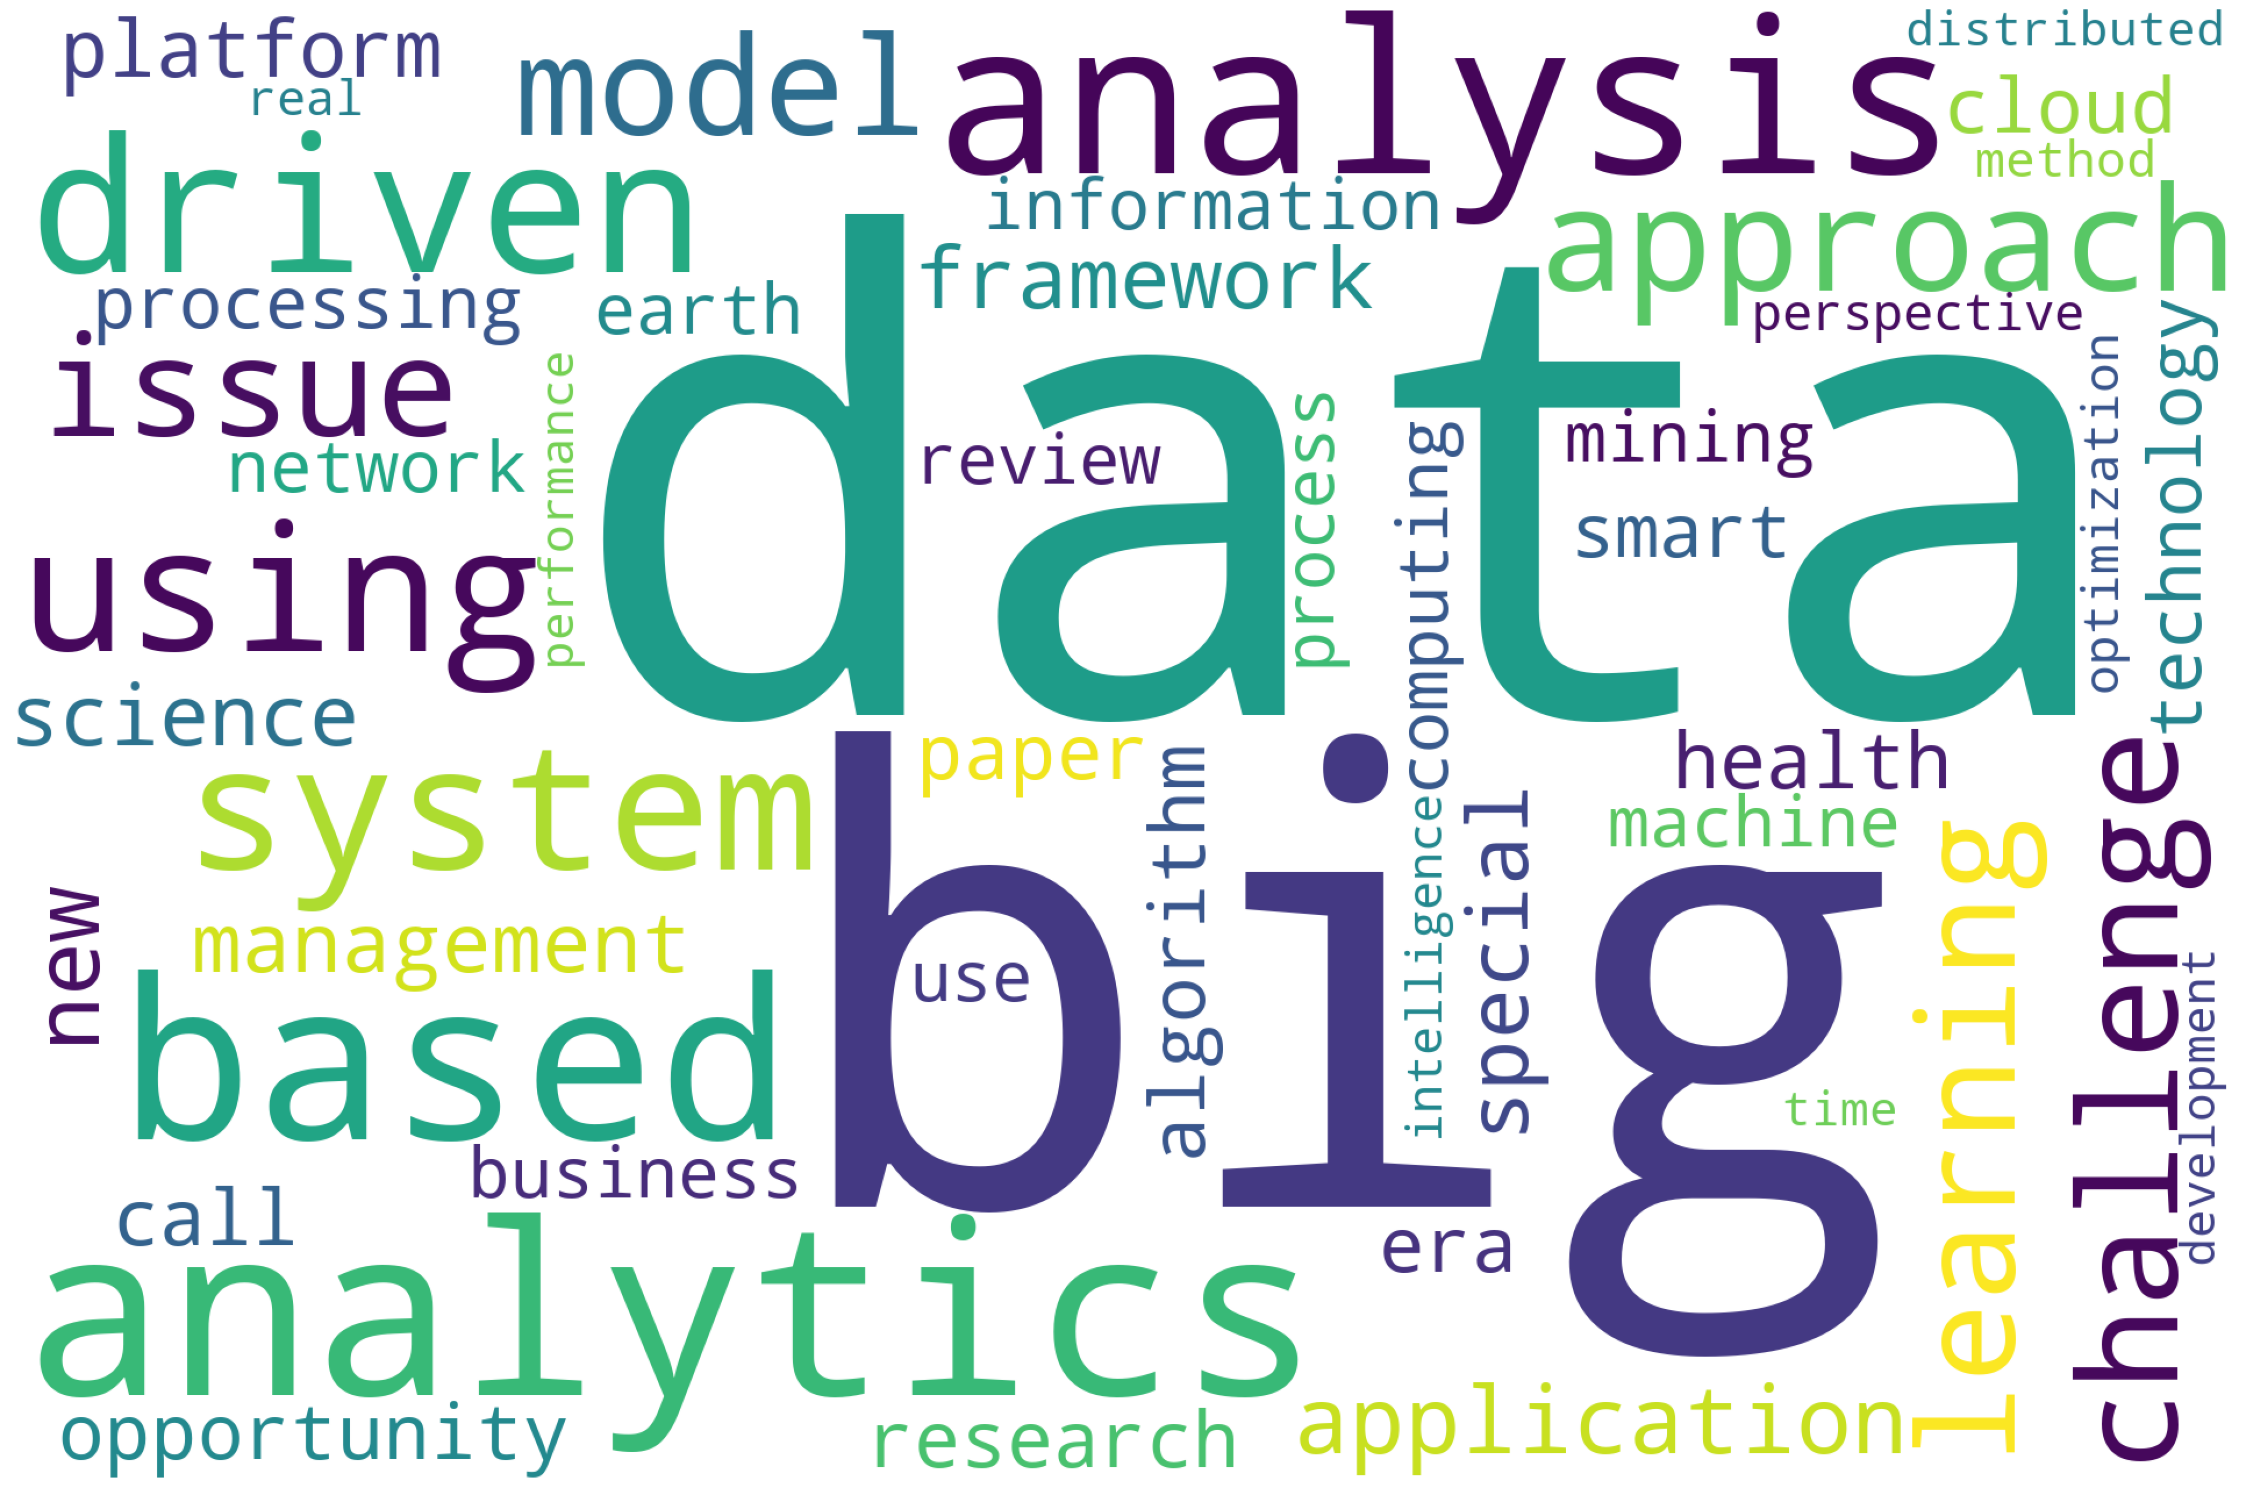

In [28]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='#FFFFFF', stopwords = stopwords, width= 1920, height=1280)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(40,40))
plt.imshow(cloud)
plt.axis('off')     #x,y 좌표 지우기
plt.show()

In [24]:
cloud.to_file('./data/riss_bigdata_wordCloud.png')